# Cosmic Watch Data Analysis

# Introduction
This code is at the begining stages, the goal is to create an analysis tool for cosmic watch data that is code based and readable to give students a place to start and the ability to read and change the code so the code is not another black box for the cosmic watch.

In [1]:
# imports some software packages we'll use
import pandas as pd #Pandas lets us name the columns of our data more likea spread sheet.
import numpy as np #Numpy is used by pandas for calculatiions
%matplotlib inline
import matplotlib as mpl #For ploting data
import matplotlib.pyplot as plt #For typing less when poloting data
import math #for other math we might do.

inline_rc = dict(mpl.rcParams) #Sets Parameters for plots.


data = pd.read_csv('https://raw.githubusercontent.com/dkallenberg/Quarknet-CosmicWatch-ipynb/main/CW_B_Data2023_Jul_10.csv')

data

,Event,RunTime,ADC,SiPM,DownTime,Temp
0,1,13745,60,17.43,2780,24.44
1,2,14676,480,130.21,2968,24.44
2,3,18822,521,150.31,3714,24.44
3,4,19396,483,132.60,3905,24.44
4,5,21261,483,132.60,4280,24.44
...,...,...,...,...,...,...
9839,9840,81991893,513,148.53,15450953,27.34
9840,9841,81992826,504,143.61,15451147,27.34
9841,9842,81997559,483,132.60,15452095,27.13
9842,9843,82001831,670,272.62,15452849,27.45


Next we are going to plot a hystogram of the event voltages, in part to see that the data was importated correctly, and also to see how it compares to other data sets.

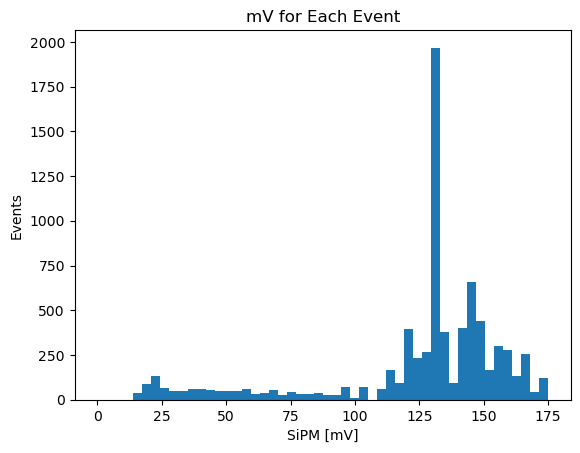

In [2]:
# This makes a histogram of that totally useless calculation above
plt.hist(data.SiPM, bins=50, range=[0,175], log=False)
plt.title("mV for Each Event")
plt.xlabel("SiPM [mV]")
plt.ylabel("Events");

It takes time for the CosmicWatch's processor to evaluate and report on events, this time is considered down time. The system reports out the down time, we need to use this to calculate the up time, the time when the Cosmic Watch was waiting for a hit. Using the up time we can calculate a rate for every event.

In [3]:
data['UpTime'] = (data.RunTime - data.DownTime)
data['Time'] = pd.to_timedelta(data.UpTime, unit='ms')
data['Minute']= (data.UpTime/(60000))
data.Minute = (data.Minute).astype(int)
data['avgRate'] = data.Event/(data.UpTime/1000)
data

,Event,RunTime,ADC,SiPM,DownTime,Temp,UpTime,Time,Minute,avgRate
0,1,13745,60,17.43,2780,24.44,10965,0 days 00:00:10.965000,0,0.091199
1,2,14676,480,130.21,2968,24.44,11708,0 days 00:00:11.708000,0,0.170823
2,3,18822,521,150.31,3714,24.44,15108,0 days 00:00:15.108000,0,0.198570
3,4,19396,483,132.60,3905,24.44,15491,0 days 00:00:15.491000,0,0.258214
4,5,21261,483,132.60,4280,24.44,16981,0 days 00:00:16.981000,0,0.294447
...,...,...,...,...,...,...,...,...,...,...
9839,9840,81991893,513,148.53,15450953,27.34,66540940,0 days 18:29:00.940000,1109,0.147879
9840,9841,81992826,504,143.61,15451147,27.34,66541679,0 days 18:29:01.679000,1109,0.147892
9841,9842,81997559,483,132.60,15452095,27.13,66545464,0 days 18:29:05.464000,1109,0.147899
9842,9843,82001831,670,272.62,15452849,27.45,66548982,0 days 18:29:08.982000,1109,0.147906


In [4]:
Data1Min = data.drop_duplicates(subset=['Minute'], keep='first')
Data1Min = Data1Min.loc[:,('Event','RunTime','DownTime','UpTime','Time','Minute','avgRate')]
Data1Min

,Event,RunTime,DownTime,UpTime,Time,Minute,avgRate
0,1,13745,2780,10965,0 days 00:00:10.965000,0,0.091199
13,14,77985,14760,63225,0 days 00:01:03.225000,1,0.221431
22,23,149323,28228,121095,0 days 00:02:01.095000,2,0.189934
34,35,222356,41913,180443,0 days 00:03:00.443000,3,0.193967
44,45,307784,57809,249975,0 days 00:04:09.975000,4,0.180018
...,...,...,...,...,...,...,...
9806,9807,81705840,15396914,66308926,0 days 18:25:08.926000,1105,0.147899
9816,9817,81771676,15409395,66362281,0 days 18:26:02.281000,1106,0.147930
9825,9826,81844742,15423177,66421565,0 days 18:27:01.565000,1107,0.147934
9831,9832,81922570,15437887,66484683,0 days 18:28:04.683000,1108,0.147884


In [5]:
Data1Min['DeltaCount'] = Data1Min.Event - Data1Min.Event.shift(1)

Data1Min['DeltaUpTime'] = Data1Min.UpTime - Data1Min.UpTime.shift(1)

Data1Min['Rate'] = Data1Min.DeltaCount / (Data1Min.DeltaUpTime /1000)
Data1Min

,Event,RunTime,DownTime,UpTime,Time,Minute,avgRate,DeltaCount,DeltaUpTime,Rate
0,1,13745,2780,10965,0 days 00:00:10.965000,0,0.091199,NaN,NaN,NaN
13,14,77985,14760,63225,0 days 00:01:03.225000,1,0.221431,13.0,52260.0,0.248756
22,23,149323,28228,121095,0 days 00:02:01.095000,2,0.189934,9.0,57870.0,0.155521
34,35,222356,41913,180443,0 days 00:03:00.443000,3,0.193967,12.0,59348.0,0.202197
44,45,307784,57809,249975,0 days 00:04:09.975000,4,0.180018,10.0,69532.0,0.143819
...,...,...,...,...,...,...,...,...,...,...
9806,9807,81705840,15396914,66308926,0 days 18:25:08.926000,1105,0.147899,2.0,17595.0,0.113669
9816,9817,81771676,15409395,66362281,0 days 18:26:02.281000,1106,0.147930,10.0,53355.0,0.187424
9825,9826,81844742,15423177,66421565,0 days 18:27:01.565000,1107,0.147934,9.0,59284.0,0.151812
9831,9832,81922570,15437887,66484683,0 days 18:28:04.683000,1108,0.147884,6.0,63118.0,0.095060


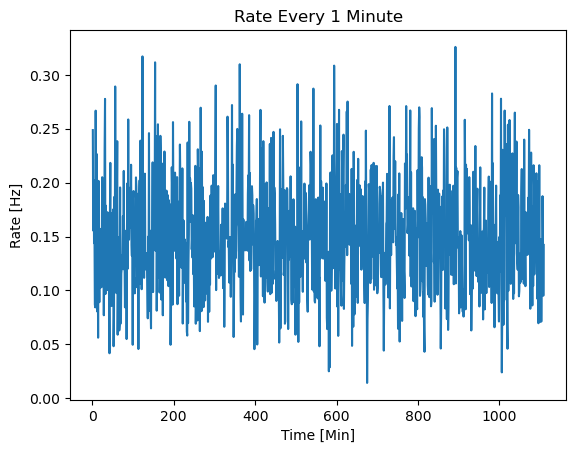

In [6]:
plt.plot(Data1Min.Minute,Data1Min.Rate)
plt.title("Rate Every 1 Minute")
plt.xlabel("Time [Min]")
plt.ylabel("Rate [Hz]");

In [7]:
#Data5Min = pd.DataFrame(columns=['Event','DownTime','Uptime','Minute'])
Data5Min = Data1Min.query('Minute % 5 == 0')

Data5Min = Data5Min.loc[:,('Event','RunTime','DownTime','UpTime','Time','Minute','avgRate')]

Data5Min

,Event,RunTime,DownTime,UpTime,Time,Minute,avgRate
0,1,13745,2780,10965,0 days 00:00:10.965000,0,0.091199
53,54,375992,70462,305530,0 days 00:05:05.530000,5,0.176742
95,96,755948,141414,614534,0 days 00:10:14.534000,10,0.156216
133,134,1112309,208124,904185,0 days 00:15:04.185000,15,0.148200
169,170,1477408,276378,1201030,0 days 00:20:01.030000,20,0.141545
...,...,...,...,...,...,...,...
9637,9638,80218899,15115893,65103006,0 days 18:05:03.006000,1085,0.148042
9687,9688,80590262,15186155,65404107,0 days 18:10:04.107000,1090,0.148125
9738,9739,80961346,15256419,65704927,0 days 18:15:04.927000,1095,0.148223
9773,9774,81355787,15330758,66025029,0 days 18:20:25.029000,1100,0.148035


In [8]:
Data5Min['DeltaCount'] = Data5Min.Event - Data5Min.Event.shift(1)
Data5Min['DeltaUpTime'] = Data5Min.UpTime - Data5Min.UpTime.shift(1)
Data5Min['Rate'] = Data5Min.DeltaCount / (Data5Min.DeltaUpTime /1000)


Data5Min

,Event,RunTime,DownTime,UpTime,Time,Minute,avgRate,DeltaCount,DeltaUpTime,Rate
0,1,13745,2780,10965,0 days 00:00:10.965000,0,0.091199,NaN,NaN,NaN
53,54,375992,70462,305530,0 days 00:05:05.530000,5,0.176742,53.0,294565.0,0.179926
95,96,755948,141414,614534,0 days 00:10:14.534000,10,0.156216,42.0,309004.0,0.135921
133,134,1112309,208124,904185,0 days 00:15:04.185000,15,0.148200,38.0,289651.0,0.131192
169,170,1477408,276378,1201030,0 days 00:20:01.030000,20,0.141545,36.0,296845.0,0.121275
...,...,...,...,...,...,...,...,...,...,...
9637,9638,80218899,15115893,65103006,0 days 18:05:03.006000,1085,0.148042,48.0,299992.0,0.160004
9687,9688,80590262,15186155,65404107,0 days 18:10:04.107000,1090,0.148125,50.0,301101.0,0.166057
9738,9739,80961346,15256419,65704927,0 days 18:15:04.927000,1095,0.148223,51.0,300820.0,0.169537
9773,9774,81355787,15330758,66025029,0 days 18:20:25.029000,1100,0.148035,35.0,320102.0,0.109340


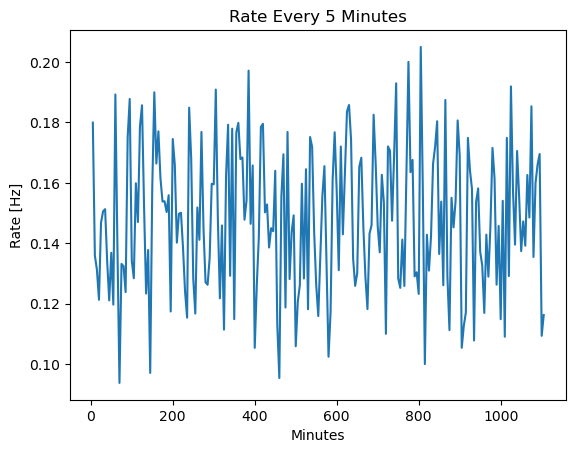

In [9]:
plt.plot(Data5Min.Minute,Data5Min.Rate)
plt.title("Rate Every 5 Minutes")
plt.xlabel("Minutes")
plt.ylabel("Rate [Hz]");

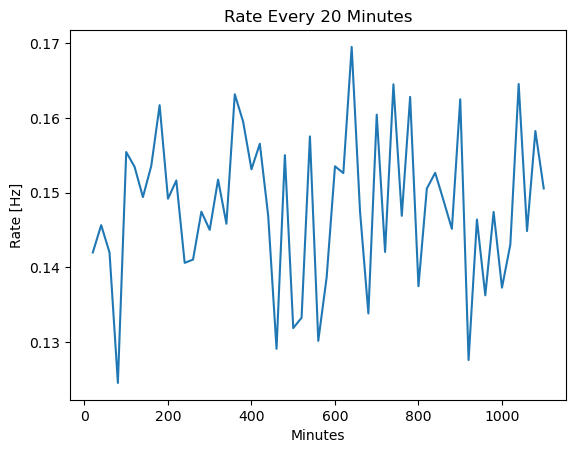

In [10]:
Data20Min = Data1Min.query('Minute % 20 == 0')

Data20Min = Data20Min.loc[:,('Event','RunTime','DownTime','UpTime','Time','Minute','avgRate')]

Data20Min['DeltaCount'] = Data20Min.Event - Data20Min.Event.shift(1)

Data20Min['DeltaUpTime'] = Data20Min.UpTime - Data20Min.UpTime.shift(1)

Data20Min['Rate'] = Data20Min.DeltaCount / (Data20Min.DeltaUpTime /1000)

plt.plot(Data20Min.Minute,Data20Min.Rate)
plt.title("Rate Every 20 Minutes")
plt.xlabel("Minutes")
plt.ylabel("Rate [Hz]");